In [11]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [12]:
class env:
    def __init__(self,obs_x,obs_y,X_triangle,xmin,xmax,ymin,ymax):
        self.obst_x = obs_x
        self.obst_y = obs_y
        self.xlim = (xmin,xmax)
        self.ylim = (ymin,ymax)
        self.X_triangle = X_triangle
        
    def area(self, x1, y1, x2, y2, x3, y3): # Calculating the area of a triangle
        return abs((x1 * (y2 - y3) + x2 * (y3 - y1)  
                    + x3 * (y1 - y2)) / 2.0) 
    
    def isInside(self, x1, y1, x2, y2, x3, y3, x, y): # Checking if a point lies inside a triangle.

        A = self.area(x1, y1, x2, y2, x3, y3) 

        A1 = self.area(x, y, x2, y2, x3, y3) 
 
        A2 = self.area(x1, y1, x, y, x3, y3) 
 
        A3 = self.area(x1, y1, x2, y2, x, y) 

        if(A == A1 + A2 + A3): 
            return True
        else: 
            return False
        
    def obs_add(self,ox,oy):
        self.obst_x += ox
        self.obst_y += oy

    def inobstacle(self,x1,y1,x2,y2): #check if edge lies inside obstacle
        c=1 #assume no collision
        obs_num = len(self.obst_x)/4 
        for i in range(1,int(obs_num)+1): #Checking if the edge lies in one of the rectangles
            xomin=self.obst_x[4*(i-1)]
            xomax=self.obst_x[4*(i-1)+2]
            yomin=self.obst_y[4*(i-1)]
            yomax=self.obst_y[4*(i-1)+1]
            for j in range(0,101):
                u=j/100.0
                x=x1*u+x2*(1-u)
                y=y1*u+y2*(1-u)
                if (x>=xomin) and (x<=xomax) and (y>=yomin) and (y<=yomax):
                    c=0
                    break
            if c==0:
                break
                
        if c==1: # If a collision hasnt occured with a rectangle
            for i in range(2):
                x1t = self.X_triangle[3*i][0]
                y1t = self.X_triangle[3*i][1]
                x2t = self.X_triangle[3*i+1][0]
                y2t = self.X_triangle[3*i+1][1]
                x3t = self.X_triangle[3*i+2][0]
                y3t = self.X_triangle[3*i+2][1]
                for j in range(0,101):
                    u=j/100.0
                    x=x1*u+x2*(1-u)
                    y=y1*u+y2*(1-u)
                    if (self.isInside(x1t, y1t, x2t, y2t, x3t, y3t, x, y)): 
                        c=0
                        break
                if c == 0:
                    break
        return c

    def isfree(self): #check if new node lies inside obstacle
        n= G.number_of_nodes()-1
        (x,y)= (G.x[n], G.y[n]) 
        obs_num = len(self.obst_x)/4 #four vertices for each rectangular obstacle
        for i in range(1,int(obs_num)+1):
            xomin=self.obst_x[4*(i-1)]
            xomax=self.obst_x[4*(i-1)+2]
            yomin=self.obst_y[4*(i-1)]
            yomax=self.obst_y[4*(i-1)+1]
            if (x>=xomin) and (x<=xomax) and (y>=yomin) and (y<=yomax):
                G.remove_node(n)
                return 0
                break
        for i in range(2): # For triangle
            x1 = self.X_triangle[3*i][0]
            y1 = self.X_triangle[3*i][1]
            x2 = self.X_triangle[3*i+1][0]
            y2 = self.X_triangle[3*i+1][1]
            x3 = self.X_triangle[3*i+2][0]
            y3 = self.X_triangle[3*i+2][1]
            if (self.isInside(x1, y1, x2, y2, x3, y3, x, y)): 
                G.remove_node(n)
                return 0
                break             
        return 1
                
    def ingoal(self):
        n= G.number_of_nodes()-1
        (x,y)= (G.x[n], G.y[n]) 
        tol = 5
        if (np.linalg.norm(np.array([x-xg,y-yg])**2)<tol):
            return 1
        else:
            return 0

#check for a specific node
    def isfree_xy(self,x,y): 
        obs_num = len(self.obst_x)/4 #four vertices for each rectangular obstacle
        for i in range(1,obs_num+1):
            xomin=self.obst_x[4*(i-1)]
            xomax=self.obst_x[4*(i-1)+2]
            yomin=self.obst_y[4*(i-1)]
            yomax=self.obst_y[4*(i-1)+1]
            if (x>=xomin) and (x<=xomax) and (y>=yomin) and (y<=yomax):
                return 0
            break
        for i in range(2): # For triangle
            x1 = self.X_triangle[3*i][0]
            y1 = self.X_triangle[3*i][1]
            x2 = self.X_triangle[3*i+1][0]
            y2 = self.X_triangle[3*i+1][1]
            x3 = self.X_triangle[3*i+2][0]
            y3 = self.X_triangle[3*i+2][1]
            if (self.isInside(x1, y1, x2, y2, x3, y3, x, y)): 
                return 0
            break 

#Sensing
#Check for obstacles given the robot's current position and the sensor 
#Only hidden obstacles are checked, others are known a-priori

#     def sense (self,x,y,r):
#         obs_num = len(hvx)/4 #four vertices for each rectangular obstacle
#         for i in range(1,obs_num+1):
#             xomin=hvx[4*(i-1)]-r
#             xomax=hvx[4*(i-1)+2]+r
#             yomin=hvy[4*(i-1)]-r
#             yomax=hvy[4*(i-1)+1]+r
#             if (x>=xomin) and (x<=xomax) and (y>=yomin) and (y<=yomax):
# #if the robot is within the sensing range of the obstacle, add it to visibile list
#                 hx_i= [hvx[4*(i-1)],hvx[4*(i-1)],hvx[4*(i-1)+2],hvx[4*(i-1)+2]]
#                 hy_i= [hvy[4*(i-1)],hvy[4*(i-1)+1],hvy[4*(i-1)+1],hvy[4*(i-1)]]
#                 self.obs_add(hx_i,hy_i)
# #add point where new obstacle detected
#                 return 1

In [13]:
class RRT:
    def __init__(self,nstart):
        (x,y,theta0)=nstart
        self.x=[]
        self.y=[]
        self.theta=[]
        self.parent=[]
        self.x.append(x)
        self.y.append(y)
        self.theta.append(theta0)
        #first node is the only node whose parent is itself
        self.parent.append(0)

    #get metric value (current metric is euclidean distance)
    def metric(self,n1,n2):
        (x1,y1)= (self.x[n1],self.y[n1])
        (x2,y2)= (self.x[n2],self.y[n2])
        x1=float(x1)
        y1=float(y1)
        x2=float(x2)
        y2=float(y2)
        px=(x1-x2)**(2)
        py=(y1-y2)**(2)
        metric = (px+py)**(0.5)
        return metric

    def holonomic_kinematics(xdot,ydot,thetadot):
        theta = thetadot*del_t
        w1 = theta
        w2 = theta + 2*np.pi/3
        w3 = theta + 4*np.pi/3
        controls = np.array([[xdot,ydot,thetadot]]).T
        kin_mat = 1/wrad*np.array([[-np.sin(w1),np.cos(w1),rbot],
                                   [-np.sin(w2),np.cos(w2),rbot],
                                   [-np.sin(w3),np.cos(w3),rbot]])
        ang_velos = np.dot(kin_mat,controls)
        wv1 = ang_velos[0][0]*rbot
        wv2 = ang_velos[1][0]*rbot
        wv3 = ang_velos[2][0]*rbot
        return wv1,wv2,wv3
        
        
    #expand a random point
    #calls subroutines to find nearest node and connect it
    def expand (self):
        #add random node
        thetadot = random.uniform(-thetadot_lim,thetadot_lim)
        xdot = random.uniform(vxmin,vxmax)
        ydot = random.uniform(vymin,vymax)
        x = xdot*del_t
        y = ydot*del_t
        theta = thetadot*del_t
#         x = random.uniform (E.xlim[0], E.xlim[1])
#         y = random.uniform (E.ylim[0], E.ylim[1])
        n= self.number_of_nodes() #new node number
        self.add_node(n,x,y,theta)
        if E.isfree()!=0:
            #find nearest node
            nnear = self.near(n)
            #find new node based on step size
            self.step(nnear,n,theta)
            #connect the random node with its nearest node
            self.connect(nnear,n)

    def bias (self):
        #add random node
        n= self.number_of_nodes() #new node
        self.add_node(n,xg,yg) #test goal region
        #find nearest node
        nnear = self.near(n)
        #find new node based on step size
        self.step(nnear,n)
        #connect the random node with its nearest node
        self.connect(nnear,n)

    #nearest node
    def near(self,n):
        #find a near node
        dmin = self.metric(0,n)
        nnear = 0
        for i in range(0,n):
            if self.metric(i,n) < dmin:
                dmin=self.metric(i,n)
                nnear = i
        return nnear

#step size
    def step(self,nnear,nrand,theta):
        d = self.metric(nnear,nrand)
        if d>dmax:
            u=dmax/d
            (xnear,ynear)= (self.x[nnear],self.y[nnear])
            (xrand,yrand)= (self.x[nrand],self.y[nrand]) 
            (px,py)=(xrand-xnear,yrand-ynear)
            theta_des = math.atan2(py,px)
            (x,y)=(xnear+dmax*math.cos(theta_des),ynear+dmax*math.sin(theta_des))
            self.remove_node(nrand)
            self.add_node(nrand,x,y,theta) #this is a new node between rand and near

#connect two nodes (local planner)
    def connect(self,n1,n2):
        (x1,y1)= (self.x[n1],self.y[n1])
        (x2,y2)= (self.x[n2],self.y[n2])
        n= G.number_of_nodes()-1
        #subdivide path into 100 small segments and ensure each segment is collision free
        if E.inobstacle(x1,y1,x2,y2)==0:
            self.remove_node(n2)
        else:
            self.add_edge(n1,n2)


#add node
    def add_node(self,n,x,y,theta):
        self.x.insert(n, x)
        self.y.insert(n, y)
        self.theta.insert(n,theta)

#remove node
    def remove_node(self,n):
        self.x.pop(n)
        self.y.pop(n)
        self.theta.pop(n)

#add edge
    def add_edge(self,parent,child):
        self.parent.insert(child,parent)

#remove node
    def remove_edge(self,n):
        self.parent.pop(n)
#clear
    def clear(self,nstart):
        (x,y)=nstart
        self.x=[]
        self.y=[]
        self.parent=[]
        self.x.append(x)
        self.y.append(y)
        #first node is the only node whose parent is itself
        self.parent.append(0)
        
#number of nodes
    def number_of_nodes(self):
        return len(self.x)

#path to goal
    def path_to_goal(self):
        #find goal state
        for i in range (0,G.number_of_nodes()):
            (x,y)= (self.x[i],self.y[i])
            if (x>=xgmin) and (x<=xgmax) and (y>=ygmin) and (y<=ygmax):
                self.goalstate = i
                break
        #add goal state to and its parent node to the path
        self.path=[]
        self.path.append(i)
        newpos=self.parent[i]
        #keep adding parents
        while (newpos!=0):
            self.path.append(newpos)
            newpos=self.parent[newpos]
        #add start state
        self.path.append(0)

#     def prun(self):
#         #initial query nodes in the path
#         #we already know 0-1 is collision free
#         #start by checking 0-2
#         s=0
#         e=2
#         self.tpath=[]
#         self.tpath.append(self.path[s])
#         for e in range(len(self.path)-1):
#             (x1,y1)=(self.x[self.path[s]],self.y[self.path[s]])
#             (x2,y2)=(self.x[self.path[e]],self.y[self.path[e]])
#             if E.inobstacle(x1,y1,x2,y2)==0: #CC is detected
#                 c=0
#                 self.tpath.append(self.path[e-1])
#                 s=e-1
#         self.tpath.append(self.path[-1])

        
    #draw tree
    def showtree(self,k):
        node_num = 0
        for i in range (0,self.number_of_nodes()):
            par=self.parent[i]
            plt.plot([self.x[i],self.x[par]],[self.y[i],self.y[par]],k,lw=0.5)
#             n = len(self.path)-1
#             if (node_num <= n-2):
#                 n1 = self.path[n-node_num]
#                 n2 = self.path[n-(node_num+1)]
#                 if (self.x[i]==self.x[n1] and self.y[i]==self.y[n1]):
# #                     print ("yay")
#                     plt.plot([self.x[n1],self.x[n2]],[self.y[n1],self.y[n2]],'ro-',lw=1,markersize=3)
#                     node_num+=1
            plt.title('Step: %d' %(i+1))
            name = 'data/snap%s.png'%str(i)
            plt.savefig(name, dpi = 200)

    #draw path 
    def showpath(self,k):
        n = len(self.path)-1
        start = self.path[n]
        start_w1x = self.x[start]+rbot*np.cos(self.theta[start])
        start_w1y = self.y[start]+rbot*np.sin(self.theta[start])
        start_w2x = self.x[start]+rbot*np.cos(self.theta[start]+2*np.pi/3)
        start_w2y = self.y[start]+rbot*np.sin(self.theta[start]+2*np.pi/3)
        start_w3x = self.x[start]+rbot*np.cos(self.theta[start]+4*np.pi/3)
        start_w3y = self.y[start]+rbot*np.sin(self.theta[start]+4*np.pi/3)
        w1_pos.append((start_w1x,start_w1y))
        w2_pos.append((start_w2x,start_w2y))
        w3_pos.append((start_w3x,start_w3y))
        for i in range (len(self.path)-1):
            n = len(self.path)-1
            n1=self.path[n-i]
            n2=self.path[n-(i+1)]
            x_diff = self.x[n2]-self.x[n1]
            y_diff = self.y[n2]-self.x[n1]
            theta_diff = self.theta[n2]-self.theta[n1]
            xdot = x_diff/del_t
            ydot = y_diff/del_t
            thetadot = theta_diff/del_t
#             vw1,vw2,vw3 = holonomic_kinematics(xdot,ydot,thetadot)
            w1_x = self.x[n2]+rbot*np.cos(self.theta[n2])
            w1_y = self.y[n2]+rbot*np.sin(self.theta[n2])
            w2_x = self.x[n2]+rbot*np.cos(self.theta[n2]+2*np.pi/3)
            w2_y = self.y[n2]+rbot*np.sin(self.theta[n2]+2*np.pi/3)
            w3_x = self.x[n2]+rbot*np.cos(self.theta[n2]+4*np.pi/3)
            w3_y = self.y[n2]+rbot*np.sin(self.theta[n2]+4*np.pi/3)
            centre_pos.append((self.x[n2],self.y[n2]))
            w1_pos.append((w1_x,w1_y))
            w2_pos.append((w2_x,w2_y))
            w3_pos.append((w3_x,w3_y))
            
            plt.plot([self.x[n1],self.x[n2]],[self.y[n1],self.y[n2]],k,lw=1,markersize=3)
            plt.title('Step: %d' %(self.number_of_nodes()))
            name = 'data/snap%s.png'%str(i+self.number_of_nodes())
#             plt.show()
            plt.savefig(name, dpi = 200)
#             self.visualize_wheels(w1_pos,w2_pos,w3_pos,centre_pos)

In [14]:
def draw ():
    #draw boundary
    plt.plot([0,0,100,100,0],[0,100,100,0,0],'k',lw=0.5)

    #goal region
#     plt.plot([xgmin,xgmin,xgmax,xgmax,xgmin],[ygmin,ygmax,ygmax,ygmin,ygmin],'g',lw=2)
    plt.plot(xg,yg,'g*',markersize=20)

    num = len(E.obst_x)/4
    for i in range(1,int(num)+1): # Plotting rectangles
        plt.plot([v_origx[4*(i-1)],v_origx[4*(i-1)+1],v_origx[4*(i-1)+2],
        v_origx[4*(i-1)+3],v_origx[4*(i-1)]],[v_origy[4*(i-1)],v_origy[4*(i-1)+1],
        v_origy[4*(i-1)+2],v_origy[4*(i-1)+3],v_origy[4*(i-1)]],'k',lw=2)

#     pp
    plt.scatter(E.X_triangle[:, 0], E.X_triangle[:, 1])
    t1 = plt.Polygon(E.X_triangle[:3,:])
    plt.gca().add_patch(t1)
    t2 = plt.Polygon(E.X_triangle[3:6,:])
    plt.gca().add_patch(t2)
    G.showtree('0.15')
 
    #draw path
    G.showpath('ro-')
#     G.showtpath('g*-')
    
    #draw obstacles


    #draw  hidden obstacles (if they exist)
#     obs_num = len(hvx)/4
#     for i in range(1,int(obs_num)+1):
#         plt.plot([hvx[4*(i-1)],hvx[4*(i-1)+1],hvx[4*(i-1)+2],hvx[4*(i-1)+3],hvx[4*(i-1)]],[hvy[4*(i-1)],hvy[4*(i-1)+1],hvy[4*(i-1)+2],hvy[4*(i-1)+3],hvy[4*(i-1)]],'k--',lw=2)	

    plt.show()

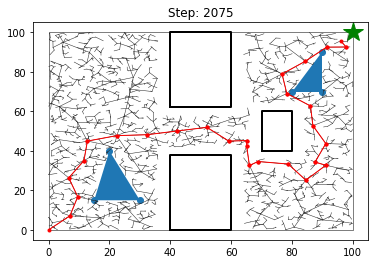

In [15]:
nmax = 5000

#goal region
xg=100
yg=100
epsilon=5
vxmin = vymin = 0
vxmax = xg
vymax= yg
thetadot_lim = 0.1
xgmin=xg-epsilon
xgmax=xg+epsilon
ygmin=yg-epsilon
ygmax=yg+epsilon
rbot = 2

#extend step size
dmax = 10
del_t = 1
#start the root of the tree
nstart =(0,0,0) 
n_rect_obst = 3
wrad = 0.1

#specify vertices for rectangular obstacles (each object has four vertices)
#obstacles known a priori
v_origx= [40,40,60,60,70,70,80,80,40,40,60,60]
v_origy= [62,100,100,62,40,60,60,40, 0,38,38, 0]

centre_pos = []
w1_pos = []
w2_pos = []
w3_pos = []

## Triangular obstacles
X_triangle = np.array([[15,15],[30,15], [20, 40],[80,70],[90,70],[90,90]])

# after padding obstacles ########## FILL IN TRIANGLE COZ IDK HOW TO DO
vx = [i for i in v_origx]
vy = [i for i in v_origy]
for i in range(n_rect_obst):
    vx[i*4]-=2*rbot
    vx[i*4+1] -=2*rbot
    vx[i*4+2] +=2*rbot
    vx[i*4+3] +=2*rbot
    vy[i*4]-=2*rbot
    vy[i*4+3] -=2*rbot
    vy[i*4+1] +=2*rbot
    vy[i*4+2] +=2*rbot

#create an RRT tree with a start node
G=RRT(nstart)

#environment instance
E=env(vx,vy,X_triangle,0,100,0,100)

def main():
#     draw()
    for i in range(0,nmax):
#         if i%10!=0:
        G.expand()
        
        if E.ingoal()==1:
            break
    G.path_to_goal()
#     G.prun()
    
    draw()

    #display initial plan under limited sensing
#     G.path_to_goal()
#     G.prun()

    
# run main when RRT is called
if __name__ == '__main__':
    main()

In [16]:
centre_pos_x = [i[0] for i in centre_pos]
centre_pos_y = [i[1] for i in centre_pos]



In [17]:
def visualize_wheels(w1_pos,w2_pos,w3_pos):
    print ("I'm here")
    w1_pos_x = [i[0] for i in w1_pos]
    w1_pos_y = [i[1] for i in w1_pos]

    w2_pos_x = [i[0] for i in w2_pos]
    w2_pos_y = [i[1] for i in w2_pos]

    w3_pos_x = [i[0] for i in w3_pos]
    w3_pos_y = [i[1] for i in w3_pos]
    for j in range(len(w1_pos)):
#         print ("Loopy")
#         print (j)
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        ax.plot([0,0,100,100,0],[0,100,100,0,0],'k',lw=0.5)
        ax.plot(100,100,'g*',markersize=20)
        num = len(E.obst_x)/4
        for i in range(1,int(num)+1): # Plotting rectangles
            ax.plot([v_origx[4*(i-1)],v_origx[4*(i-1)+1],v_origx[4*(i-1)+2],
            v_origx[4*(i-1)+3],v_origx[4*(i-1)]],[v_origy[4*(i-1)],v_origy[4*(i-1)+1],
            v_origy[4*(i-1)+2],v_origy[4*(i-1)+3],v_origy[4*(i-1)]],'k',lw=2)
    #         ax.plot(centre_pos_x,centre_pos_y,'k',markersize=3)
        ax.plot(w1_pos_x[:j],w1_pos_y[:j],'ro--')
        ax.plot(w2_pos_x[:j],w2_pos_y[:j],'go--')
        ax.plot(w3_pos_x[:j],w3_pos_y[:j],'bo--')
    #     ax.plot(w1_pos_x[-1],w1_pos_y[-1],'r*',markersize=3)
    #     ax.plot(w2_pos_x[-1],w2_pos_y[-1],'g*',markersize=3)
    #     ax.plot(w3_pos_x[-1],w3_pos_y[-1],'b*',markersize=3)
    #     plt.legend(["Centre","Wheel1","Wheel2","Wheel3"])
        name = 'wheel_data/snap%s.png'%str(j)
        plt.savefig(name, dpi = 200)
#         plt.cla()
#         plt.close()

I'm here


<ipython-input-17-2803604c280e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure()


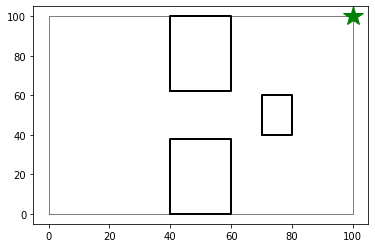

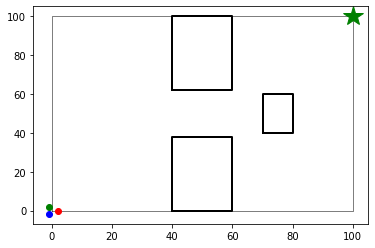

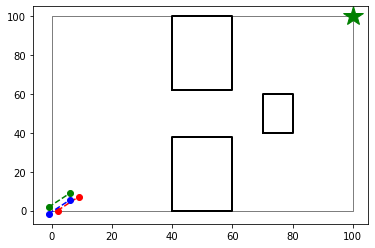

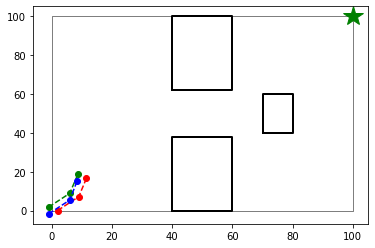

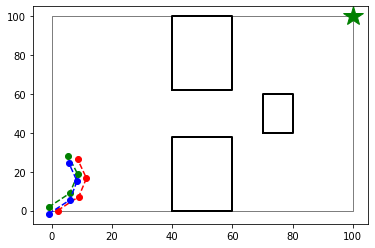

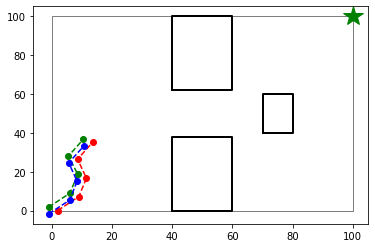

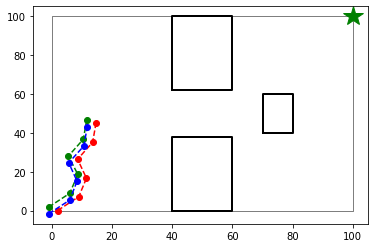

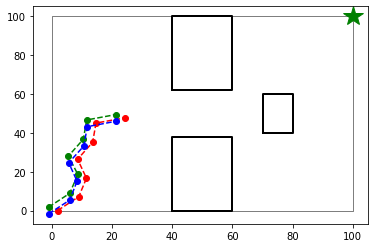

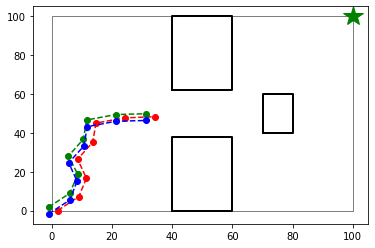

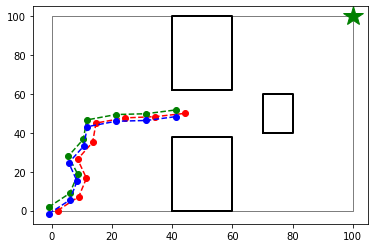

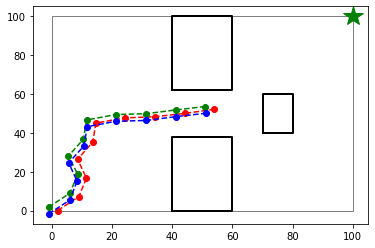

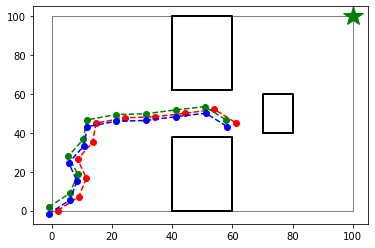

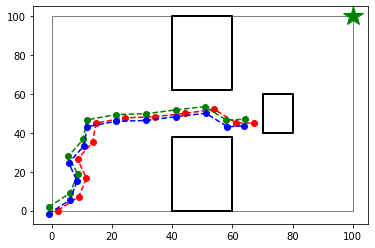

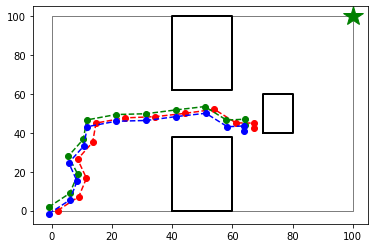

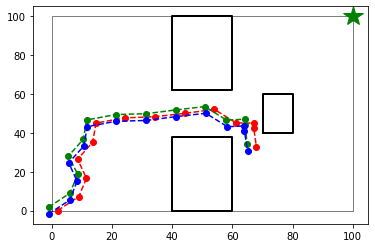

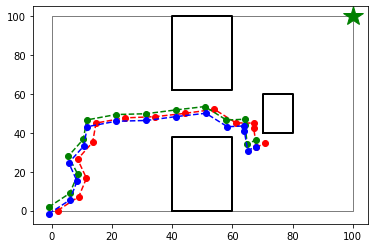

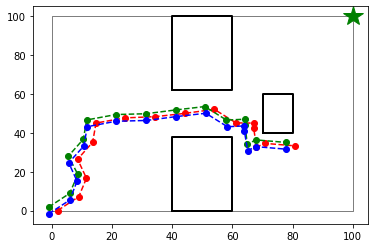

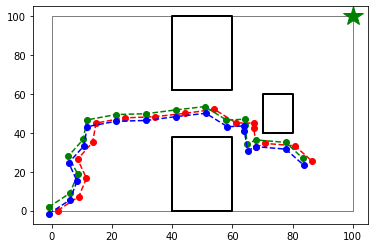

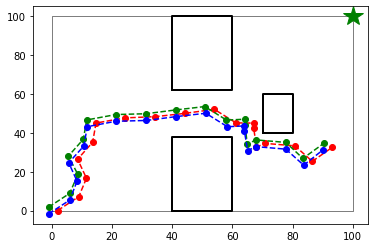

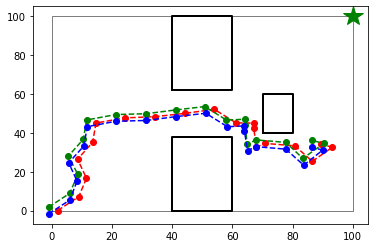

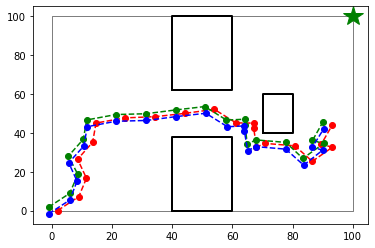

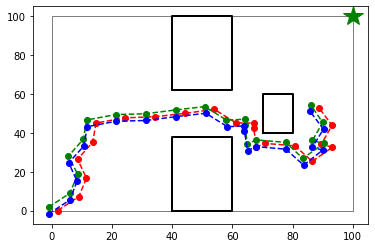

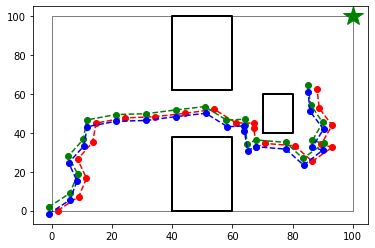

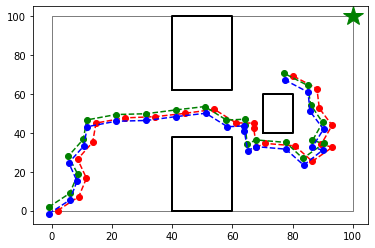

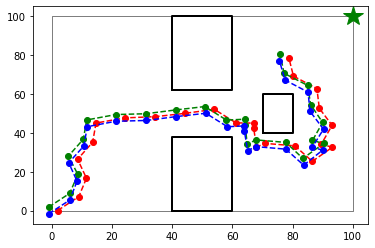

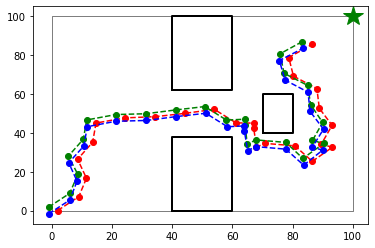

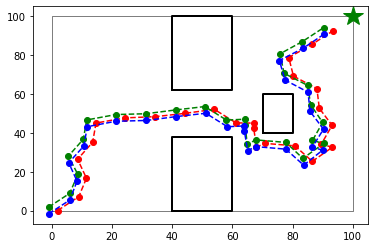

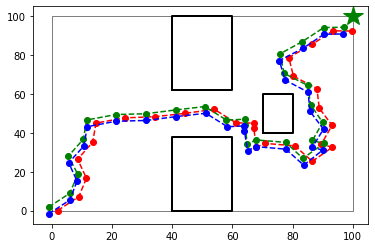

In [18]:
visualize_wheels(w1_pos,w2_pos,w3_pos)